# Import numpy, pandas, matpotlib, and sklearn libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load Advertising.csv using pandas

In [2]:
df = pd.read_csv("data/Advertising.csv", index_col = 0)

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
x = df.drop("Sales", axis = 1)
y = df["Sales"]
x.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


# Standardize each column of the dataset

In [5]:
scaled = pd.DataFrame(scale(x), columns=["TV","Radio","Newspaper"])
scaled.insert(0, 'bias', [1]*len(scaled))
scaled

,bias,TV,Radio,Newspaper
0,1,0.969852,0.981522,1.778945
1,1,-1.197376,1.082808,0.669579
2,1,-1.516155,1.528463,1.783549
3,1,0.052050,1.217855,1.286405
4,1,0.394182,-0.841614,1.281802
...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217
196,1,-0.617035,-1.240003,-1.033598
197,1,0.349810,-0.942899,-1.111852
198,1,1.594565,1.265121,1.640850


# Divide the dataset into training and testing, with 0.85 and 0.15 ratio, respectively.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(scaled, y, train_size=0.85, test_size=0.15, random_state = 42)

In [7]:
print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (170, 4)
y_train size: (170,)

x_test size: (30, 4)
y_test size: (30,)


# Fit the model on the training set

In [8]:
def initialize_weights():
    np.random.seed(2)
    weights = np.random.uniform(low=0.0, high=1.0, size=4)
    return weights

Test `initialize_weights()`

In [9]:
init_w = initialize_weights()
init_w

array([0.4359949 , 0.02592623, 0.54966248, 0.43532239])

In [10]:
def predict(predictors, weights):
    y_hat = np.dot(predictors, weights)
    return y_hat

Test `predict(predictors, weights)`

In [11]:
y_hat = predict(x_train, init_w)
y_hat

array([-5.02423053e-01,  6.42887652e-02,  2.01179507e+00,  2.33427757e+00,
        2.58080929e-01,  3.67137873e-01,  8.45134434e-01,  1.26756730e+00,
       -3.94946771e-01, -6.01719221e-01, -3.00431606e-01, -5.57226297e-01,
        6.23151167e-01, -2.31009946e-01, -6.14736444e-01, -6.58804965e-01,
        3.48564626e-01,  2.30155072e-01, -1.51676072e-01,  2.80155411e-01,
        1.36776891e+00, -5.13235661e-01,  2.23623702e+00,  1.37586911e+00,
       -7.34835701e-01, -2.06288090e-01, -1.72551691e-01,  1.59942557e+00,
        8.37663832e-03, -7.76277217e-01, -4.76492853e-01,  1.92016184e-01,
        3.69246560e-01,  1.54626706e+00, -6.73722695e-01, -3.76510959e-02,
        6.88140447e-02, -1.60569618e-01, -6.75347753e-01,  5.57371898e-01,
       -6.25389737e-01, -8.75594037e-01,  1.57581024e-01,  9.84498577e-01,
        1.91043774e+00, -4.17893439e-02,  2.98993516e-01,  6.35168330e-01,
        1.40620823e-01,  8.64215932e-01,  2.01324431e+00,  2.94581951e-01,
        2.57471261e-02,  

In [12]:
def compute_cost(targets, predictions):
    m = len(targets)
    error = (predictions - targets)**2
    cost = sum(error)/(2*m)
    return cost

Test `compute_cost(targets, predictions)`

In [13]:
cost = compute_cost(y_train, y_hat)
cost

104.84929975967793

In [14]:
def compute_gradient(predictors, targets, predictions, lr):
    m = len(targets)
    error = predictions - targets
    w = lr*(np.dot(error, predictors))/m
    return w

Test `compute_gradients(predictors, targets, predictions, lr)`

In [15]:
gradient = compute_gradient(x_train, y_train, y_hat, 0.8)
gradient

array([-10.95060861,  -3.43580198,  -1.65688273,  -0.19438347])

In [16]:
def update_weights(weights, gradients):
    weights -= gradients
    return weights

Test `update_weights(weights, gradients)`

In [17]:
updated = update_weights(init_w, gradient)
updated

array([11.38660352,  3.46172821,  2.20654521,  0.62970587])

In [18]:
def grad_descent(features, targets, iterations, lr):
    weights = initialize_weights()
    costs = []
    for _ in range(iterations):
        prediction = predict(features, weights)
        cost = compute_cost(targets, prediction)
        costs.append(cost)
        gradient = compute_gradient(features, targets, prediction, lr)
        weights = update_weights(weights, gradient)
    return weights, costs

Test `grad_descent(features, targets, iterations, lr)`

Smaller learning rate value ($\alpha$) creates smaller steps and makes a more refined curve but is slower.

In [19]:
w, costs = grad_descent(x_train, y_train, 1000, 0.01)
w

array([14.02424588,  3.83782736,  2.78824111,  0.01961474])

In [20]:
def plot_costs(costs):
    plt.plot(costs)

Test `plot_costs(costs)`

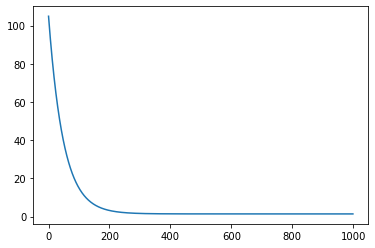

In [21]:
plot_costs(costs)

# Predict the quantitative response y on the train set. (Standardized Data)

In [22]:
w, costs = grad_descent(x_train, y_train, 1000, 0.01)
prediction_Ys_train = (x_train).dot(w)
prediction_Ys_train

9      12.489614
18     10.004377
55     21.295443
75     12.092719
150    18.256793
         ...    
106     6.245314
14     18.409346
92     19.143516
179    12.346943
102    17.504868
Length: 170, dtype: float64

# Predict the quantitative response y on the test set. (Standardized Data)

In [23]:
w, costs = grad_descent(x_test, y_test, 1000, 0.01)
prediction_Ys_test = (x_test).dot(w)
prediction_Ys_test

95     16.270577
15     20.873025
30     22.468468
158     9.493349
128    22.943598
115    12.338435
69     21.566197
170     7.139825
174    14.604146
45     15.451323
66      8.739702
182     6.256865
165    14.440655
78      8.281513
186     9.935608
177    12.469267
56      7.698560
152    16.950157
82      9.882673
68     19.809353
124    19.584005
16     11.579779
148    11.839913
93     21.478423
65      7.893150
60      5.532040
84     21.158559
67     12.373276
125     9.015543
132     8.023006
dtype: float64

# Revert back standardized data into the original form

In [24]:
reverted = scaled.drop("bias", axis=1)
reverted *= np.std(x) 
reverted += x.mean()
reverted.insert(0, 'bias', [1]*len(reverted))
reverted

,bias,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,1,44.5,39.3,45.1
2,1,17.2,45.9,69.3
3,1,151.5,41.3,58.5
4,1,180.8,10.8,58.4
...,...,...,...,...
195,1,38.2,3.7,13.8
196,1,94.2,4.9,8.1
197,1,177.0,9.3,6.4
198,1,283.6,42.0,66.2


# Observe the cost results and analyse

In [25]:
x_train, x_test, y_train, y_test = train_test_split(reverted, y, train_size=0.85, test_size=0.15, random_state = 42)
print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (170, 4)
y_train size: (170,)

x_test size: (30, 4)
y_test size: (30,)


The presence of the predictor set $x^{(i)}_J$ in the graident descent formula affects the step size. The difference in ranges causes different step sizes for each feature and overshoots the minimum.

C:\Users\Distortion\AppData\Local\Temp\ipykernel_31172\1182495154.py:2: RuntimeWarning: invalid value encountered in subtract
  weights -= gradients


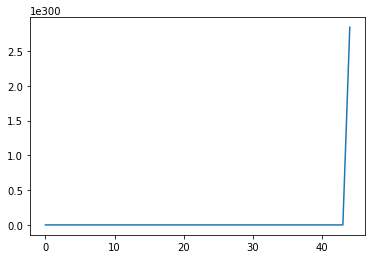

In [26]:
w, costs = grad_descent(x_train, y_train, 200, 0.08)
plot_costs(costs)

This can be resolved by lowering the value of the learning rate ($\alpha$) as seen below:

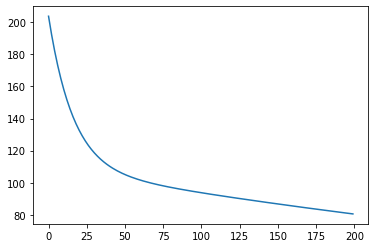

In [27]:
w, costs = grad_descent(x_train, y_train, 200, 0.000001)
plot_costs(costs)

# Predict the quantitative response y on the train set. (Original Data)

In [28]:
prediction_Yo_train = (x_train).dot(w)
prediction_Yo_train

9       2.142389
18     14.794485
55     39.609745
75     53.960444
150    10.568755
         ...    
106    15.752488
14     26.107454
92     30.605133
179     5.789097
102     3.055650
Length: 170, dtype: float64

# Predict the quantitative response y on the test set. (Original Data)

In [29]:
w_test, costs_test = grad_descent(x_test, y_test, 2000, 0.00001)
prediction_Yo_test = (x_test).dot(w)
prediction_Yo_test

95     29.424985
15     36.323719
30     19.574486
158    34.796865
128    18.140865
115    34.252910
69     24.372727
170    11.069735
174    -1.198681
45     16.719311
66     12.405675
182    11.967321
165    24.231181
78     18.603630
186     6.026276
177    10.870510
56     29.178584
152    10.062614
82     19.596384
68      9.568492
124    35.060409
16     57.435106
148    23.531807
93     35.702355
65      2.915370
60      7.217802
84     26.422867
67      6.326177
125    12.527214
132    14.509034
dtype: float64

# Analysis Questions

### Assume: init_w=np.array([0.0,0.0,0.0,0.0])

In [30]:
def initialize_weights():
    weights = np.array([0.0, 0.0, 0.0, 0.0])
    return weights

In [31]:
weights = initialize_weights()

### 1) What are the optimal weights found by your implemented gradient descent? Plug it into the linear model and interpret

In [32]:
x_train, x_test, y_train, y_test = train_test_split(scaled, y, train_size=0.85, test_size=0.15, random_state = 42)

In [33]:
w, costs = grad_descent(x_train, y_train, 200, 0.8)
w

array([14.02477267,  3.83763432,  2.79115525,  0.01635503])

$h_0 (x)=14.02477267+(3.83763432)TV+(2.79115525)Radio+(0.01635503)Newspaper$

The formed linear model suggests that television advertising (3.83763432) is the most impactful as a predictor variable in sales, followed by radio advertising (2.79115525) and newspaper advertising (0.01635503) respectively.

### 2) Provide a scatter plot of the $\hat{y}^i$  and $y^{(i)}$ for both the train and test set. Is there a trend? Provide an r2 score (also available in sklearn).

R2: 88.09862791659417


Text(0.5, 1.0, 'Actual vs Predicted')

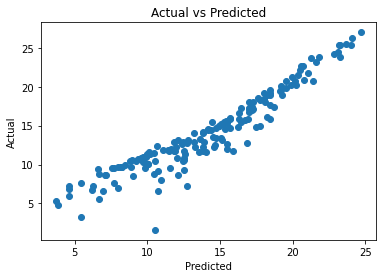

In [41]:
print("R2:", r2_score(prediction_Ys_train, y_train)*100)
f, ax = plt.subplots()
plt.scatter(prediction_Ys_train, y_train)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs Predicted")

R2: 91.61302798119006


Text(0.5, 1.0, 'Actual vs Predicted')

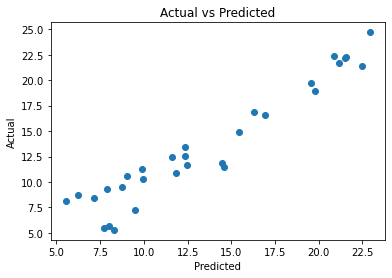

In [35]:
print("R2:", r2_score(prediction_Ys_test, y_test)*100)
f, ax = plt.subplots()
plt.scatter(prediction_Ys_test, y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs Predicted")

### 3) What happens to the error, r2, and cost as the number of iterations increase?

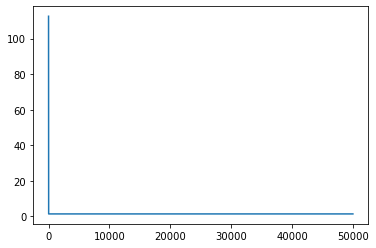

In [43]:
w, costs = grad_descent(x_train, y_train, 50000, 0.8)
plot_costs(costs)

The error, r2, and cost approach a certain value the more iterations are made. This can be explained with the error value decreasing as the predicted value reaches closer to the target value, r2 increasing for every independent variable in the model, and the cost value naturally being optimised.

### 4) Visualize the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE PLOT.

In [65]:
w_1, c_1 = grad_descent(x_train, y_train, 200, 0.1)
w_01, c_01 = grad_descent(x_train, y_train, 200, 0.01)
w_001, c_001 = grad_descent(x_train, y_train, 200, 0.001)
w_0001, c_0001 = grad_descent(x_train, y_train, 200, 0.0001)
w_2, c_2 = grad_descent(x_train, y_train, 200, 0.2)

plt.scatter(c_1)

TypeError: scatter() missing 1 required positional argument: 'y'

### 5) Is there a relationship on the learning rate and the number of iterations?

Yes, the learning rate and number of iterations directly affects the optimal weights received from the gradient descent functions. This is because the learning rate is used to scale the magnitude of parameter updates while the number of iterations dictate how frequent this occurs.

### 6) Compare the results with the results of ordinary least squares function.

In [54]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
print("Least Squares R2:\t", r2_score(y_pred, y_test)*100)
print("Gradient Descent R2:\t", r2_score(prediction_Ys_test, y_test)*100)

Least Squares R2:	 88.80410451866064
Gradient Descent R2:	 91.61302798119006


Comparing the R2 values, we can see that the gradient descent model is a better fit than the least squares model.